**Ejercicio 1**

In [9]:
### EJ 1 FALTA
##1. UtilizandoinformacióndisponibleenlapaginadelINDEC,expliquen brevemente cómo se identifica a las personas desocupadas.

**Ejercicio 2**

Entren a la pagina https://www.indec.gob.ar/yvayanalasección Servicios y Herramientas -> Bases de datos. Descarguen la base de microdatos de la Encuesta Permanente de Hogares (EPH) correspondiente al primer trimestre de 2004 y 2024 en formato .dta y .xls, respectivamente (una vez descargadas, las bases a usar son Individual_t104.dta y usu_individual_T124.xls). En la pagina web, también encontrara un diccionario de variables con el nombre de “Diseño de registro y estructura para las bases preliminares (hogares y personas)”. Descarguen el diccionario de cada año. En estos archivos se les indica qué significa cada variable que aparece en la base de datos, en particular, en la sección de Diseño de registros de la base Personas.

In [10]:
#!pip install pyreadstat


In [11]:
#!pip install pandas

In [12]:
import pandas as pd
import pyreadstat  # Para leer archivos .dta de Stata
import matplotlib.pyplot as plt

In [13]:
datos_2004, meta = pyreadstat.read_dta("/Users/Sol/Downloads/Individual_t104.dta")
print("Datos del primer trimestre de 2004:")
datos_2004.head()



Datos del primer trimestre de 2004:


,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000


In [14]:
ruta_xls = "/Users/Sol/Downloads/usu_individual_T124.xlsx" 
datos_2024 = pd.read_excel(ruta_xls)

print("Datos del primer trimestre de 2024:")
datos_2024.head()



Datos del primer trimestre de 2024:


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,3,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
1,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,4,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
2,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,5,0,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
3,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,1,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610
4,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,2,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610


**EJ 2. A.**

Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires, y unan ambos trimestres en una sola base.



In [15]:

# Cambiamos los nombres de las columnas a minúsculas para poder unirlas
datos_2024.columns = datos_2024.columns.str.lower()
datos_2024

datos_2004.columns = datos_2004.columns.str.lower()
datos_2004



,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45284,285733,1.0,1.0,1.0,2004.0,1.0,44.0,N,31.0,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45285,285733,1.0,2.0,1.0,2004.0,1.0,44.0,N,31.0,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45286,285733,1.0,3.0,1.0,2004.0,1.0,44.0,N,31.0,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45287,285733,1.0,4.0,0.0,2004.0,1.0,44.0,N,31.0,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000


In [16]:
# Comparar las columnas de ambos
diferentes_1 = set(datos_2004.columns) - set(datos_2024.columns)  # Columnas que están en df_2004 pero no en df_2024
diferentes_2 = set(datos_2024.columns) - set(datos_2004.columns)  # Columnas que están en df_2024 pero no en df_2004

print(f"Columnas en datos_2004 pero no en df_2024: {diferentes_1}")
print(f"Columnas en datos_2024 pero no en df_2004: {diferentes_2}")

# Eliminamos las columnas de 2004 relacionadas al plan "jefas y jefes de hogar" {'pj3_1', 'pj1_1', 'idimpp', 'pj2_1'}
datos_2004 = datos_2004.drop(columns=['pj3_1', 'pj1_1', 'idimpp', 'pj2_1'])

# Eliminamos las columnas de 2024 relacionadas a ponderadores que no estan en 2004 {'pondii', 'pondiio', 'pondih'}
# Eliminamos la columna de 2024 relacionadas a la fecha de nacimiento que no estan en 2004 {'ch05'}
# Eliminamos la columna de 2024 relacionadas a la imputación que no estan en 2004 {'imputa'}
datos_2024 = datos_2024.drop(columns=['imputa', 'pondii', 'pondiio', 'pondih', 'ch05'])

Columnas en datos_2004 pero no en df_2024: {'pj2_1', 'pj1_1', 'idimpp', 'pj3_1'}
Columnas en datos_2024 pero no en df_2004: {'imputa', 'pondih', 'pondiio', 'ch05', 'pondii'}


In [17]:
#  Crear EL FILTRO por aglomerado
mask_2004 = (datos_2004['aglomerado'] == 32) | (datos_2004['aglomerado'] == 33)
mask_2024 = (datos_2024['aglomerado'] == 32) | (datos_2024['aglomerado'] == 33)


# Aplico el filtro y uno
df_trimestre1_filtrado = datos_2004[mask_2004]
df_trimestre2_filtrado = datos_2024[mask_2024]

variables = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf','ano4']

# Filtrar las columnas en los DataFrames
# aca cambiamos por un momento el data frame dfcombinado para chequear de que las varibles sean numericas, 
# luego volvimos a pasar dfcombinado a normal con todas las variables

df_trimestre1_filtrado = df_trimestre1_filtrado[variables]
df_trimestre2_filtrado = df_trimestre2_filtrado[variables]

df_combinado = pd.concat([df_trimestre1_filtrado, df_trimestre2_filtrado], ignore_index=True)

df_combinado # todas numericas, ok


,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,ano4
0,1.0,79.0,4.0,1.0,3.0,3.0,1.0,368.0,2004.0
1,2.0,67.0,3.0,4.0,2.0,1.0,0.0,0.0,2004.0
2,2.0,74.0,4.0,1.0,2.0,3.0,1.0,440.0,2004.0
3,1.0,54.0,2.0,2.0,2.0,1.0,0.0,532.5,2004.0
4,2.0,51.0,2.0,2.0,6.0,3.0,4.0,532.5,2004.0
...,...,...,...,...,...,...,...,...,...
14693,2.0,43.0,3.0,1.0,3.0,1.0,0.0,0.0,2024.0
14694,1.0,21.0,5.0,1.0,3.0,0.0,0.0,0.0,2024.0
14695,1.0,20.0,5.0,1.0,3.0,0.0,0.0,0.0,2024.0
14696,1.0,11.0,5.0,1.0,3.0,0.0,0.0,0.0,2024.0


In [18]:
# todas numericas, con la funcion unique me fijo que las variables sean iguales, y no haya categoricas
print(f" Los valores únicos de ch04 son {df_trimestre2_filtrado['ch04'].unique()}")
print ("\n")
print(f" Los valores únicos de ch07 son {df_trimestre2_filtrado['ch07'].unique()}")
print ("\n")
print(f" Los valores únicos de nivel_ed	 son {df_trimestre2_filtrado['nivel_ed'].unique()}")
print ("\n")
print(f" Los valores únicos de estado son {df_trimestre2_filtrado['estado'].unique()}")
print ("\n")
print(f" Los valores únicos de cat_inac son {df_trimestre2_filtrado['cat_inac'].unique()}")

 Los valores únicos de ch04 son [2 1]


 Los valores únicos de ch07 son [4 2 5 3 9 1]


 Los valores únicos de nivel_ed	 son [2 6 1 4 3 7 5]


 Los valores únicos de estado son [1 3 4 0 2]


 Los valores únicos de cat_inac son [0 1 3 5 4 7 6 2]


**EJ 2. B.**

Si hay observaciones con valores que no tienen sentido, descártenlas (por ejemplo, ingresos y edades negativos). Expliquen las decisiones tomadas.


In [19]:

# vemos todas las columnas para analizar las variables
pd.set_option('display.max_columns', None)

# las caracteristicas que podemos analizar de cada variable
df_combinado.describe()



,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,ano4
count,14698.000000,14698.000000,14698.000000,14698.000000,14698.000000,14698.000000,14698.000000,1.469800e+04,14698.000000
mean,1.525582,35.652946,3.470540,2.375901,3.620152,2.213839,1.707171,7.697886e+04,2013.594503
std,0.499362,22.892854,1.621489,1.928577,1.849408,1.150950,1.984695,2.782966e+05,9.992115
min,1.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,2004.000000
25%,1.000000,16.000000,2.000000,1.000000,2.000000,1.000000,0.000000,5.800000e+01,2004.000000
50%,2.000000,33.000000,4.000000,1.000000,3.000000,3.000000,1.000000,2.666667e+02,2004.000000
75%,2.000000,53.000000,5.000000,4.000000,5.000000,3.000000,3.000000,5.555556e+04,2024.000000
max,2.000000,98.000000,9.000000,23.000000,7.000000,4.000000,7.000000,1.131233e+07,2024.000000


In [20]:

# CHEQUEAMOS NUMEROS NEGATIVOS
columnas_numericas = df_combinado.select_dtypes(include=['number']).columns
filtro = (df_combinado[columnas_numericas] < 0).any(axis=1)
combinado_negativos = df_combinado[columnas_numericas] < 0
combinado_negativos

negativos = len(filtro)
negativos

print('La canidad de datos negativos de la base es de: ',negativos,'. Para ninguna variable tiene sentido un valor negativo, por lo que los borramos.')


La canidad de datos negativos de la base es de:  14698 . Para ninguna variable tiene sentido un valor negativo, por lo que los borramos.


In [21]:
# Guardar la cantidad de filas antes de eliminar los valores negativos
filas_antes = df_combinado.shape[0]

# Aplicar el filtro para eliminar las filas con valores negativos
df_combinado = df_combinado[~filtro]

# Guardar la cantidad de filas después de eliminar los valores negativos
filas_despues = df_combinado.shape[0]

# Calcular y mostrar la cantidad de filas eliminadas
filas_eliminadas = filas_antes - filas_despues
print(f"Cantidad de filas eliminadas: {filas_eliminadas}") # se eliminaron todas las filas q contengan 1 num negativo, no son confiables

df_combinado



Cantidad de filas eliminadas: 182


,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,ano4
0,1.0,79.0,4.0,1.0,3.0,3.0,1.0,368.0,2004.0
1,2.0,67.0,3.0,4.0,2.0,1.0,0.0,0.0,2004.0
2,2.0,74.0,4.0,1.0,2.0,3.0,1.0,440.0,2004.0
3,1.0,54.0,2.0,2.0,2.0,1.0,0.0,532.5,2004.0
4,2.0,51.0,2.0,2.0,6.0,3.0,4.0,532.5,2004.0
...,...,...,...,...,...,...,...,...,...
14693,2.0,43.0,3.0,1.0,3.0,1.0,0.0,0.0,2024.0
14694,1.0,21.0,5.0,1.0,3.0,0.0,0.0,0.0,2024.0
14695,1.0,20.0,5.0,1.0,3.0,0.0,0.0,0.0,2024.0
14696,1.0,11.0,5.0,1.0,3.0,0.0,0.0,0.0,2024.0


In [22]:
list(df_combinado.columns)

['ch04',
 'ch06',
 'ch07',
 'ch08',
 'nivel_ed',
 'estado',
 'cat_inac',
 'ipcf',
 'ano4']

**EJ 2. C.**

Una vez hecha esa limpieza, realicen un gráfico de barras mostrando la composición por sexo para 2004 y 2024. Comenten los resultados.


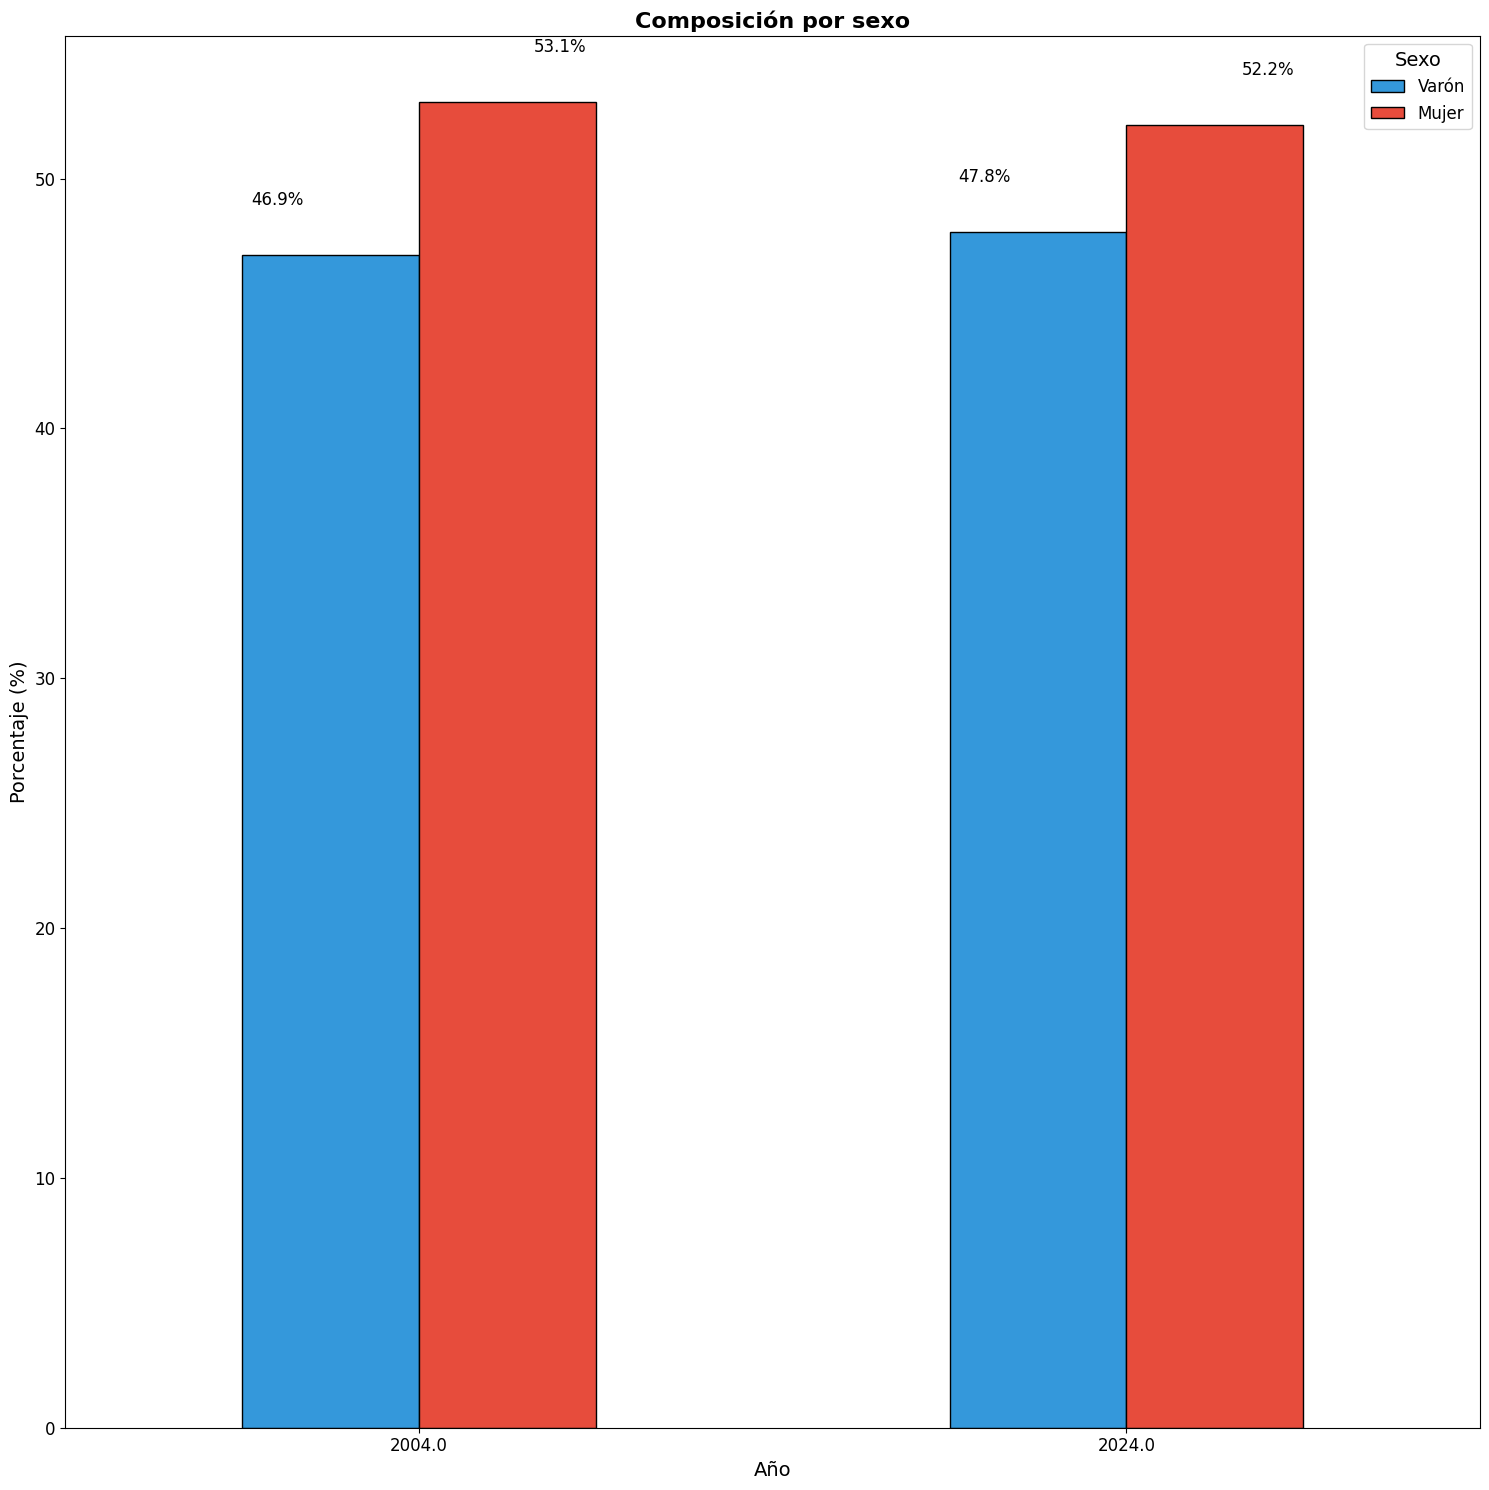

Se puede observar una composición predominante de mujeres en ambos años,
ya que estas suman un 53.1% de la población en 2004 y un 53.9% en 2024,
mientras los hombres forman parte del 46.9% y 46.1% en cada año respectivamente.


In [24]:
## Diferencias de sexos segun trimestres

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def crear_grafico_sexo_por_ano(df, anos, columna_sexo='ch04', columna_ano='ano4'):

    # Filtrar el DataFrame por los años de interés
    df_filtrado = df[df[columna_ano].isin(anos)]

    # Contar la cantidad de cada sexo por año
    conteo_por_ano = df_filtrado.groupby([columna_ano, columna_sexo]).size().unstack()

    # Renombrar los índices
    conteo_por_ano.index.names = ['Año']
    conteo_por_ano.columns = conteo_por_ano.columns.map({1: 'Varón', 2: 'Mujer'})

    # Calcular los porcentajes
    porcentajes = conteo_por_ano.div(conteo_por_ano.sum(axis=1), axis=0) * 100

    # Crear el gráfico
    ax = porcentajes.plot(kind='bar', figsize=(15, 15), color=['#3498db', '#e74c3c'], edgecolor='black')

    # Personalizar el gráfico
    plt.title('Composición por sexo', fontsize=16, weight='bold')
    plt.ylabel('Porcentaje (%)', fontsize=14)
    plt.xlabel('Año', fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)

    # Agregar etiquetas de porcentaje
    for i in range(len(porcentajes)):
        for j in range(len(porcentajes.columns)):
            ax.text(i - 0.2 + j * 0.4, porcentajes.iloc[i, j] + 2, f"{porcentajes.iloc[i, j]:.1f}%",
                    ha='center', fontsize=12, color='black')

    plt.legend(title='Sexo', fontsize=12, title_fontsize=14)
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
crear_grafico_sexo_por_ano(df_combinado, [2004, 2024])

print('Se puede observar una composición predominante de mujeres en ambos años,\n'
      'ya que estas suman un 53.1% de la población en 2004 y un 53.9% en 2024,\n'
      'mientras los hombres forman parte del 46.9% y 46.1% en cada año respectivamente.')

**EJ 2. D.**

Realicen una matriz de correlación para 2004 y 2024 con las siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO, CAT_INAC, IPCF. Utilicen alguno de los comandos disponibles en este link o este link para graficar la matriz de correlación. Comenten los resultados.

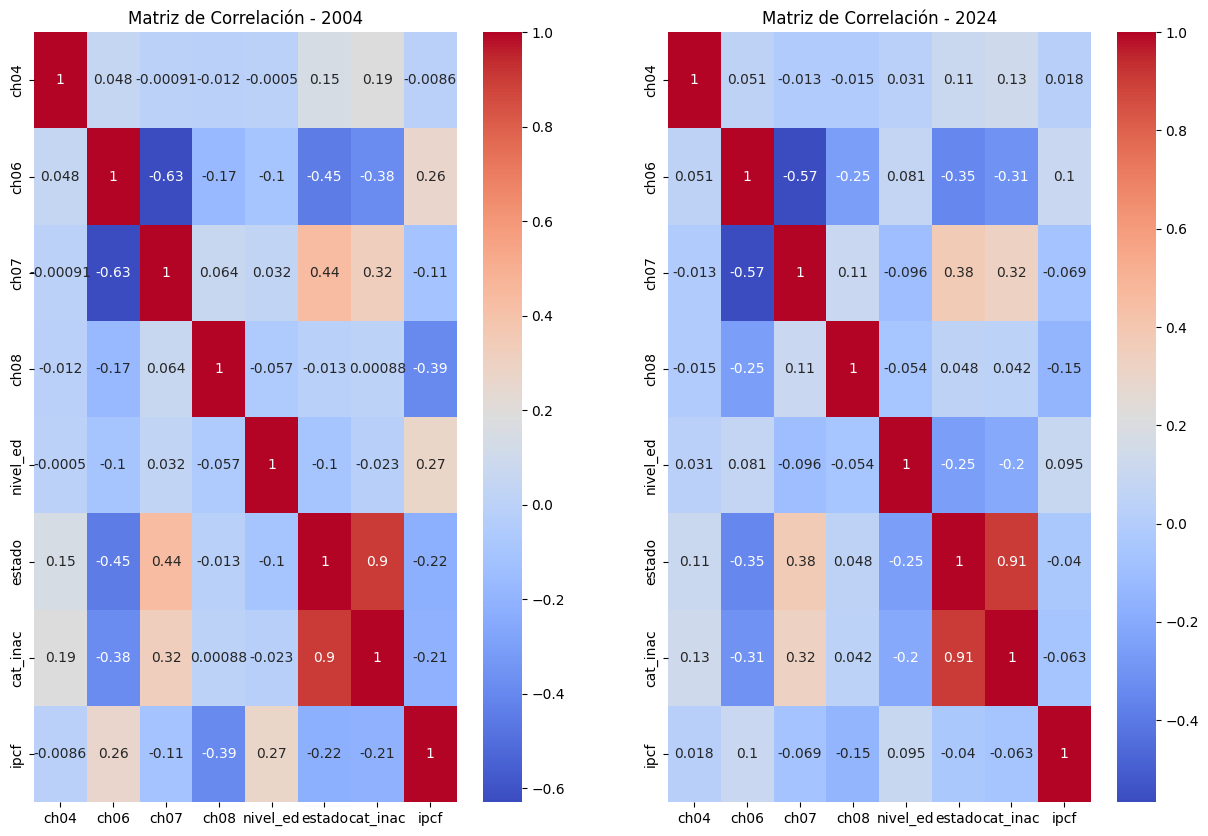

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filtrar los datos para los años 2004 y 2024
df_2004 = df_combinado[df_combinado['ano4'] == 2004]
df_2024 = df_combinado[df_combinado['ano4'] == 2024]

# Seleccionar las variables de interés
variables = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']

# Calcular las matrices de correlación (usando el método de Spearman para datos no normales)
corr_2004 = df_2004[variables].corr(method='spearman')
corr_2024 = df_2024[variables].corr(method='spearman')

# Crear heatmaps para visualizar las correlaciones
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
sns.heatmap(corr_2004, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación - 2004')

plt.subplot(1, 2, 2)
sns.heatmap(corr_2024, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación - 2024')

plt.show()



**EJ 2. E.**

¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos? ¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)?

In [26]:


# Filtramos los registros donde 'estado' es 2 o 3
desocupados_inactivos = df_combinado[df_combinado['estado'].isin([2, 3])]

# Calculamos la cantidad total de desocupados e inactivos
total_desocupados_inactivos = desocupados_inactivos.shape[0]
print(f"La cantidad de desocupados e inactivos total de la base de datos es de: {total_desocupados_inactivos}")

# Agrupamos por 'ano4' y contamos los registros con estado=2 o estado=3 por cada año
suma_por_ano = desocupados_inactivos.groupby('ano4').size()

# Filtramos solo para los años 2004.0 y 2024.0
suma_por_ano = suma_por_ano.loc[[2004.0, 2024.0]]

print("\nSuma de desocupados e inactivos por año:\n")
suma_por_ano


La cantidad de desocupados e inactivos total de la base de datos es de: 6301

Suma de desocupados e inactivos por año:



ano4
2004.0    3328
2024.0    2973
dtype: int64

In [27]:
# Agrupamos por 'ano4' y 'estado', y luego calculamos estadísticas descriptivas de 'ipcf'
tabla_ingresos_por_estado = df_combinado.groupby(['ano4', 'estado'])['ipcf']

# Mostramos la tabla resultante
print(tabla_ingresos_por_estado)

# Solo calculamos el promedio y el total de ingresos para cada grupo
tabla_ingresos_por_estado = df_combinado.groupby(['ano4', 'estado'])['ipcf'].agg(['mean', 'sum'])
tabla_ingresos_por_estado


mean           sum
ano4   estado                             
2004.0 0.0         52.533333  5.253333e+02
       1.0        476.064755  1.465803e+06
       2.0        224.231970  1.183945e+05
       3.0        315.891856  8.844972e+05
       4.0        246.116417  2.704819e+05
2024.0 0.0          0.000000  0.000000e+00
       1.0     207644.844045  6.694470e+08
       2.0      85019.145466  2.644095e+07
       3.0     130704.601499  3.479356e+08
       4.0     104745.950079  7.981641e+07

Text(0, 0.5, 'Ingreso Promedio (ipcf)')

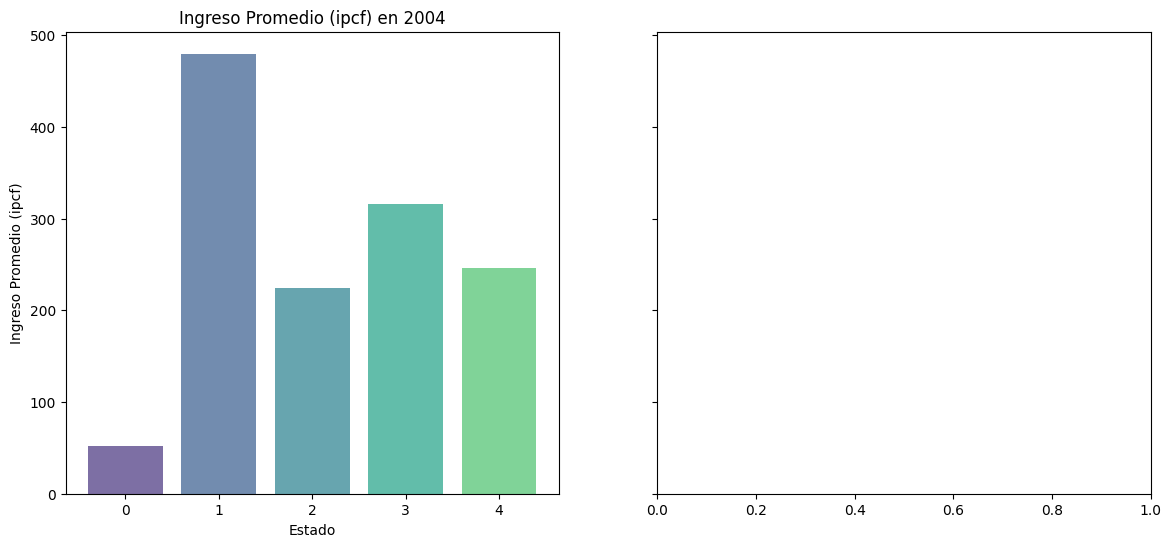

In [28]:
#graficos de ipcf y estado

# lo hicimos manual porque no funcionaba
estados = ['0', '1', '2', '3', '4']

# Configuración del gráfico
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)


# Gráfico para el año 2004
valores_2004 = [52.5, 479.9, 224.2, 315.8, 246.1]
axes[0].bar(estados, valores_2004, color= sns.color_palette("viridis"), alpha=0.7)
axes[0].set_title("Ingreso Promedio (ipcf) en 2004")
axes[0].set_xlabel("Estado")
axes[0].set_ylabel("Ingreso Promedio (ipcf)")

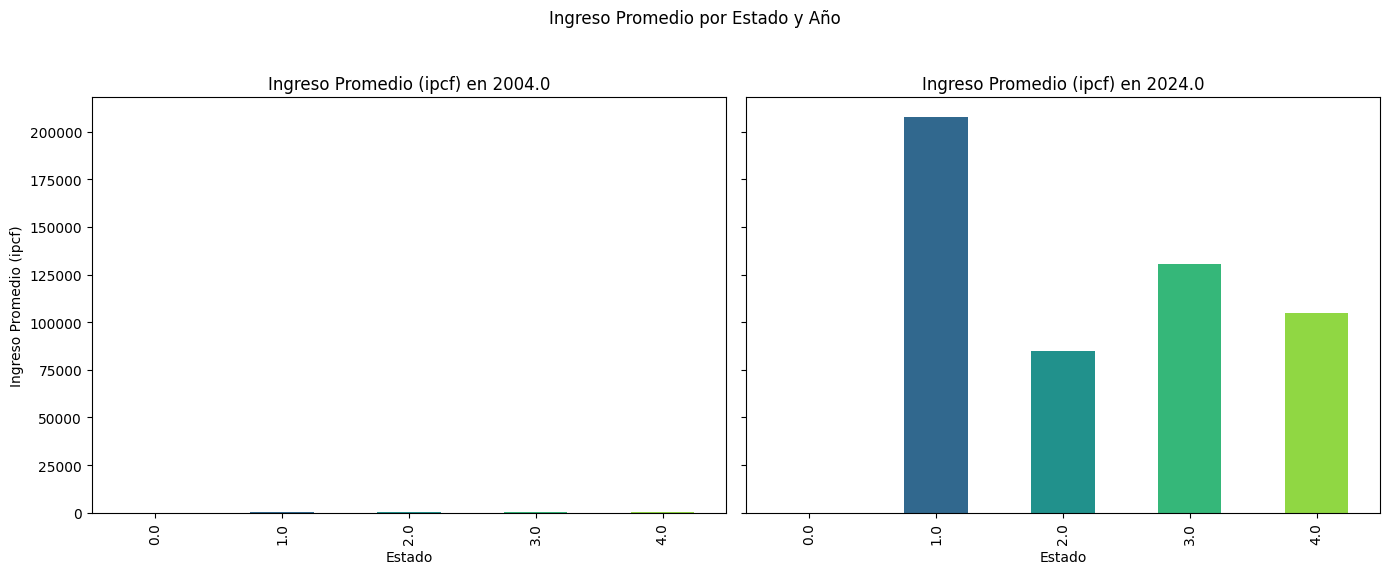

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos solo los valores de 'mean'
mean_ingresos = tabla_ingresos_por_estado['mean'].unstack()

# Creamos el plot dividido por año
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Graficamos cada año por separado
for i, year in enumerate([2004.0, 2024.0]):
    mean_ingresos.loc[year].plot(kind='bar', ax=axes[i], color=sns.color_palette("viridis", 5))
    axes[i].set_title(f"Ingreso Promedio (ipcf) en {year}")
    axes[i].set_xlabel("Estado")
    axes[i].set_ylabel("Ingreso Promedio (ipcf)")

plt.suptitle("Ingreso Promedio por Estado y Año")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



**EJ 3**

Uno de los grandes problemas de la EPH es la creciente cantidad de hogares que no reportan sus ingresos (ver por ejemplo el siguiente informe). ¿Cuántas personas no respondieron cuál es su condición de actividad? Guarden como una base distinta llamada respondieron las observaciones donde respondieron la pregunta sobre su condición de actividad (ESTADO). Las observaciones con ESTADO=0 guárdenlas en una base bajo el nombre norespondieron.


In [30]:

# Filtrar las observaciones donde ESTADO es diferente de 0 (respondieron)
respondieron = df_combinado[df_combinado['estado'] != 0]

# Crear un nuevo DataFrame para las observaciones donde ESTADO es 0 (no respondieron)
no_respondieron = df_combinado[df_combinado['estado'] == 0]


# Contar la cantidad de personas que no respondieron y total de encuestados
cantidad_no_respondieron = len(no_respondieron)
total_encuestados = len(no_respondieron) + len(respondieron)
#proporción de personas que no respondieron
proporcion_no_respondieron = cantidad_no_respondieron / total_encuestados

print("Cantidad de personas que no respondieron sobre su condición de actividad:", cantidad_no_respondieron)
print("Proporción de personas que no respondieron:", proporcion_no_respondieron)
print("Cantidad de personas que si respondieron:", len(respondieron))

Cantidad de personas que no respondieron sobre su condición de actividad: 51
Proporción de personas que no respondieron: 0.003513364563240562
Cantidad de personas que si respondieron: 14465


**EJ 4.**

Agreguen a la base respondieron una columna llamada PEA (Población Económicamente Activa) que tome 1 si están ocupados o desocupados en ESTADO. Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados.

In [31]:
import pandas as pd

# Filtramos las observaciones donde ESTADO es diferente de 0
respondieron = df_combinado[df_combinado['estado'] != 0]

# Creamos una nueva columna 'pea' con los criterios especificados
respondieron['pea'] = (respondieron['estado'].isin([1, 2])).astype(int)

# Explicación de la línea anterior:
# - respondieron['ESTADO'].isin([1, 2]) crea una Series de valores booleanos (True/False) indicando si el valor de 'ESTADO' está en [1, 2].
# - .astype(int) convierte los valores booleanos a enteros (1 para True, 0 para False).

# Ahora el DataFrame 'respondieron' tiene una nueva columna 'pea' con los valores 0 o 1 según los criterios establecidos.
respondieron 


/var/folders/86/c8bjckms4f9czm855nhybjph0000gp/T/ipykernel_9392/1720035018.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pea'] = (respondieron['estado'].isin([1, 2])).astype(int)


,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,ano4,pea
0,1.0,79.0,4.0,1.0,3.0,3.0,1.0,368.0,2004.0,0
1,2.0,67.0,3.0,4.0,2.0,1.0,0.0,0.0,2004.0,1
2,2.0,74.0,4.0,1.0,2.0,3.0,1.0,440.0,2004.0,0
3,1.0,54.0,2.0,2.0,2.0,1.0,0.0,532.5,2004.0,1
4,2.0,51.0,2.0,2.0,6.0,3.0,4.0,532.5,2004.0,0
...,...,...,...,...,...,...,...,...,...,...
14689,2.0,68.0,2.0,1.0,6.0,3.0,1.0,0.0,2024.0,0
14690,1.0,63.0,2.0,1.0,4.0,2.0,0.0,0.0,2024.0,1
14691,1.0,33.0,5.0,1.0,6.0,1.0,0.0,0.0,2024.0,1
14692,2.0,33.0,5.0,1.0,6.0,1.0,0.0,0.0,2024.0,1


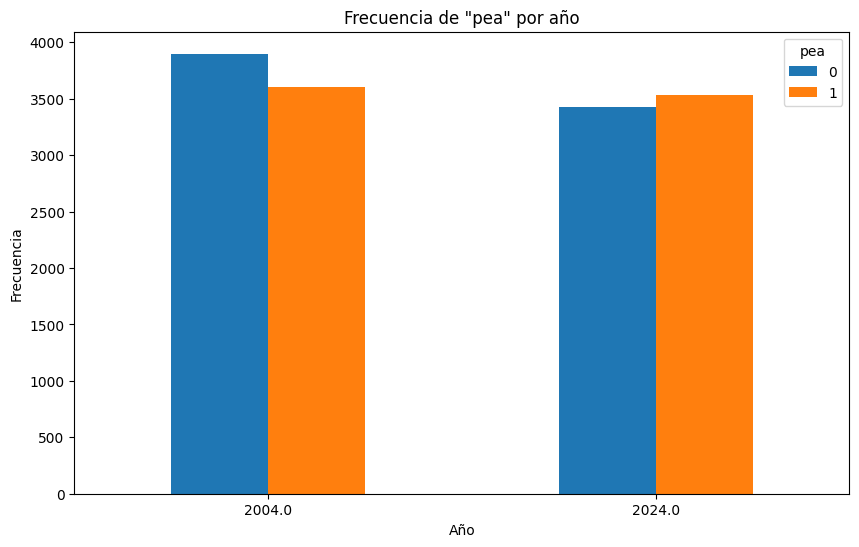

In [32]:
# Agrupamos los datos por 'ano4' y 'pea' y contamos las ocurrencias
grouped = respondieron.groupby(['ano4', 'pea']).size().reset_index(name='frecuencia')

# Filtramos los resultados para los años 2004 y 2024
resultado = grouped[(grouped['ano4'] == 2004) | (grouped['ano4'] == 2024)]


# Create a pivot table to reshape the data for easier plotting
pivot_table = resultado.pivot_table(index='ano4', columns='pea', values='frecuencia')

# Create the bar plot
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de "pea" por año')
plt.xticks(rotation=0)
plt.show()

**EJ 5.**

 Agreguen a la base respondieron una columna llamada PET (Población en Edad para Trabajar) que tome 1 si están la persona tiene entre 15 y 65 años cumplidos. Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados y compare PET con PEA.

/var/folders/86/c8bjckms4f9czm855nhybjph0000gp/T/ipykernel_9392/2399047288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pet'] = ((respondieron['ch06'] >= 15) & (respondieron['ch06'] <= 65)).astype(int)


personas capacitadas para trabajar en 2004 eran 4836 y en 2024 son 3545


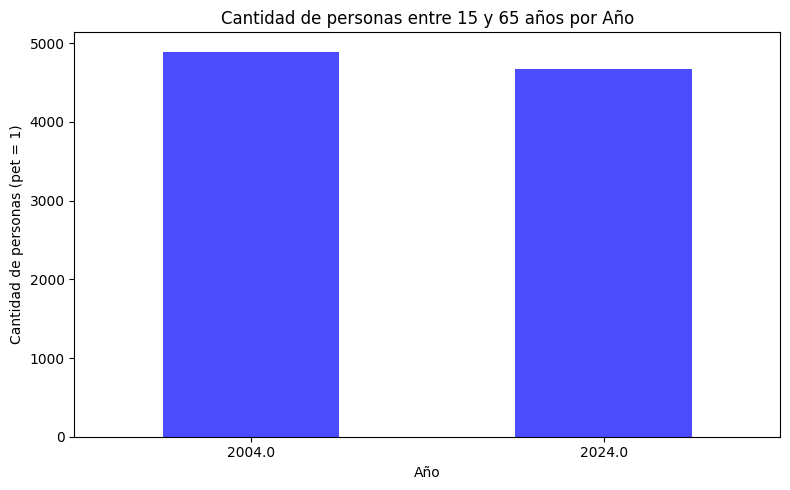

In [33]:


# Suponiendo que 'ch06' tiene edades, asignamos 1 si está en el rango [15, 65] y 0 si no
respondieron['pet'] = ((respondieron['ch06'] >= 15) & (respondieron['ch06'] <= 65)).astype(int)

# Contamos la cantidad de personas que tienen 'pet' = 1 para cada año
conteo_por_ano = respondieron.groupby('ano4')['pet'].sum()
print("personas capacitadas para trabajar en 2004 eran 4836 y en 2024 son 3545")
# Creamos el gráfico
plt.figure(figsize=(8, 5))
conteo_por_ano.plot(kind='bar', color='blue', alpha=0.7)

# Configuración del gráfico
plt.title("Cantidad de personas entre 15 y 65 años por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de personas (pet = 1)")
plt.xticks(rotation=0)
plt.tight_layout()

# Mostrar el gráfico
plt.show()



**EJ 6.**

Por ultimo, agreguen la base respondieron una columna llamada desocupado que tome 1 si esta desocupada. ¿Cuántas personas están desocupadas en 2004 vs 2024?

In [34]:

respondieron['desocupado'] = (respondieron['estado'] == 2).astype(int)

# Filtrar los datos para 2004 y 2024
desocupados_2004 = respondieron[(respondieron['ano4'] == 2004) & (respondieron['desocupado'] == 1)]
desocupados_2024 = respondieron[(respondieron['ano4'] == 2024) & (respondieron['desocupado'] == 1)]

# Contar desocupados en cada año
cantidad_desocupados_2004 = len(desocupados_2004)
cantidad_desocupados_2024 = len(desocupados_2024)

print("Cantidad de desocupados en 2004:", cantidad_desocupados_2004)
print("Cantidad de desocupados en 2024:", cantidad_desocupados_2024)


Cantidad de desocupados en 2004: 528
Cantidad de desocupados en 2024: 311


/var/folders/86/c8bjckms4f9czm855nhybjph0000gp/T/ipykernel_9392/665564093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['desocupado'] = (respondieron['estado'] == 2).astype(int)


/var/folders/86/c8bjckms4f9czm855nhybjph0000gp/T/ipykernel_9392/469557926.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Año', y='Desocupados', data=datos_desocupados, palette="pastel", edgecolor='black')


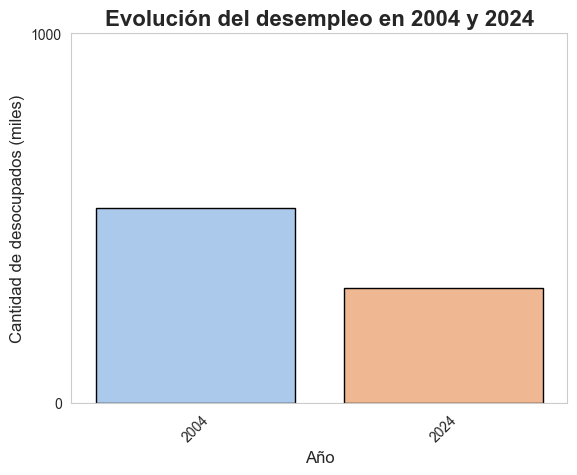

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns  # Para utilizar paletas de colores

# Crear un DataFrame con los datos de desocupados por año
datos_desocupados = pd.DataFrame({'Año': [2004, 2024],'Desocupados': [cantidad_desocupados_2004, cantidad_desocupados_2024]})

# Crear el gráfico de barras con personalizaciones
sns.set_style("whitegrid")  # Establecer un estilo de fondo con cuadrícula
sns.barplot(x='Año', y='Desocupados', data=datos_desocupados, palette="pastel", edgecolor='black')

plt.title('Evolución del desempleo en 2004 y 2024', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de desocupados (miles)', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
plt.yticks(range(0, max(datos_desocupados['Desocupados']) + 1000, 1000))  # Ajustar los ticks del eje y

plt.show()

**EJ 6. A**

(Opcional)Muestrelaproporcióndedesocupadospornivel educativo comparando 2004 vs 2024. ¿Hubo cambios de desocupados por nivel educativo?

<Figure size 1000x600 with 0 Axes>

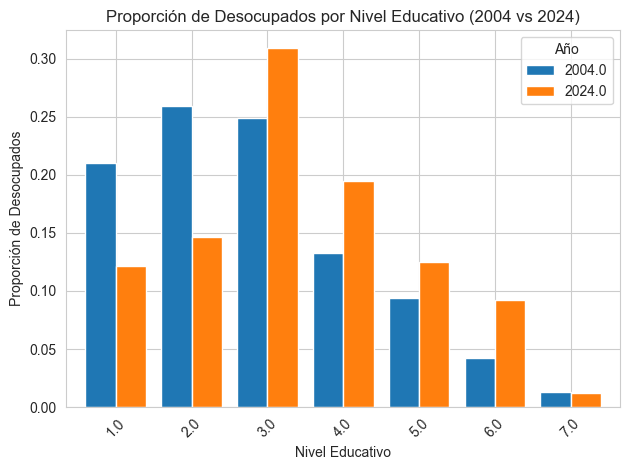

In [36]:
tabla_desocupados = respondieron.groupby(['ano4', 'nivel_ed'])['desocupado'].agg(['sum'])

import matplotlib.pyplot as plt

# Filtramos solo las filas donde 'estado' indica desocupados (estado=2 o estado=3)
desocupados = df_combinado[df_combinado['estado'].isin([2, 3])]

# Calculamos la proporción de desocupados por nivel educativo para cada año
proporcion_desocupados = desocupados.groupby(['ano4', 'nivel_ed']).size() / desocupados.groupby('ano4').size()

# Convertimos el resultado a un DataFrame para graficarlo más fácilmente
proporcion_desocupados = proporcion_desocupados.unstack()

# Graficamos la proporción de desocupados por nivel educativo en 2004 y 2024
plt.figure(figsize=(10, 6))
proporcion_desocupados.loc[[2004.0, 2024.0]].transpose().plot(kind='bar', width=0.8)

# Configuramos el gráfico
plt.title("Proporción de Desocupados por Nivel Educativo (2004 vs 2024)")
plt.xlabel("Nivel Educativo")
plt.ylabel("Proporción de Desocupados")
plt.xticks(rotation=45)
plt.legend(title="Año")
plt.tight_layout()

# Mostramos el gráfico
plt.show()


**EJ 6. B**

(Opcional)Creeunavariablecategóricadeañoscumplidos(CH06) agrupada de a 10 años. Muestre proporción de desocupados por
edad agrupada comparando 2004 vs 2024. ¿Hubo cambios de desocupados por edad?

/var/folders/86/c8bjckms4f9czm855nhybjph0000gp/T/ipykernel_9392/2602241991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combinado['grupo_edad'] = pd.cut(df_combinado['ch06'], bins=range(0, 101, 10), right=False)
/var/folders/86/c8bjckms4f9czm855nhybjph0000gp/T/ipykernel_9392/2602241991.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporcion_desocupados = desocupados.groupby(['ano4', 'grupo_edad']).size() / desocupados.groupby('ano4').size()


<Figure size 1200x600 with 0 Axes>

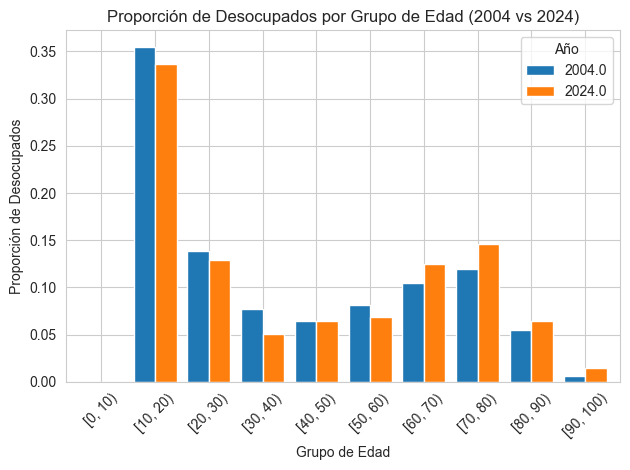

In [37]:

import matplotlib.pyplot as plt

# Crear una nueva columna 'grupo_edad' agrupando CH06 en intervalos de 10 años
df_combinado['grupo_edad'] = pd.cut(df_combinado['ch06'], bins=range(0, 101, 10), right=False)

# Filtrar solo los desocupados (estado=2 o estado=3)
desocupados = df_combinado[df_combinado['estado'].isin([2, 3])]

# Calcular la proporción de desocupados por grupo de edad y año
proporcion_desocupados = desocupados.groupby(['ano4', 'grupo_edad']).size() / desocupados.groupby('ano4').size()

# Convertir el resultado a un DataFrame para facilitar el gráfico
proporcion_desocupados = proporcion_desocupados.unstack()

# Graficar la proporción de desocupados por grupo de edad en 2004 y 2024
plt.figure(figsize=(12, 6))
proporcion_desocupados.loc[[2004.0, 2024.0]].transpose().plot(kind='bar', width=0.8)

# Configurar el gráfico
plt.title("Proporción de Desocupados por Grupo de Edad (2004 vs 2024)")
plt.xlabel("Grupo de Edad")
plt.ylabel("Proporción de Desocupados")
plt.xticks(rotation=45)
plt.legend(title="Año")
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [38]:
#list(respondieron.columns)
respondieron.columns

Index(['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac',
       'ipcf', 'ano4', 'pea', 'pet', 'desocupado'],
      dtype='object')

In [39]:
num_filas = respondieron.shape[0]
print("Cantidad de filas:", num_filas)

Cantidad de filas: 14465


In [40]:
columnas_a_analizar = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf', 'ano4','desocupado']

# Filtrar el DataFrame para conservar solo esas columnas
respondieron_entreno = respondieron[columnas_a_analizar]

In [41]:
valores_unicos = respondieron_entreno['desocupado'].unique()
print(valores_unicos)

[0 1]


**# Parte II: Clasificación**

El objetivo de esta parte del trabajo es intentar predecir si una persona 
está desocupada o no utilizando distintas variables de características individuales.

**EJ. 1**
Para cada año, partan la base respondieron en una base de prueba (test) y una de entrenamiento (train) 
utilizando el comando train_test_split. La base de entrenamiento debe comprender el 70% de los datos,
y la semilla a utilizar (random state instance) debe ser 101. 
Establezca a desocupado como su variable dependiente en la base de entrenamiento (vector y).
El resto de las variables serán las variables independientes (matriz X). 
Recuerden agregar la columna de unos (1).

In [43]:
respondieron_entreno

,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,ano4,desocupado
0,1.0,79.0,4.0,1.0,3.0,3.0,1.0,368.0,2004.0,0
1,2.0,67.0,3.0,4.0,2.0,1.0,0.0,0.0,2004.0,0
2,2.0,74.0,4.0,1.0,2.0,3.0,1.0,440.0,2004.0,0
3,1.0,54.0,2.0,2.0,2.0,1.0,0.0,532.5,2004.0,0
4,2.0,51.0,2.0,2.0,6.0,3.0,4.0,532.5,2004.0,0
...,...,...,...,...,...,...,...,...,...,...
14689,2.0,68.0,2.0,1.0,6.0,3.0,1.0,0.0,2024.0,0
14690,1.0,63.0,2.0,1.0,4.0,2.0,0.0,0.0,2024.0,1
14691,1.0,33.0,5.0,1.0,6.0,1.0,0.0,0.0,2024.0,0
14692,2.0,33.0,5.0,1.0,6.0,1.0,0.0,0.0,2024.0,0


In [44]:
# Creamos dos DataFrames filtrados
df_entreno_2004 = respondieron_entreno.loc[respondieron_entreno['ano4'] == 2004.0]
df_entreno_2024 = respondieron_entreno.loc[respondieron_entreno['ano4'] == 2024.0]

# Ahora tienes df_2004 y df_2024


In [45]:

num_filas2 = df_entreno_2004.shape[0]
print("Cantidad de filas:", num_filas2)

Cantidad de filas: 7506


In [46]:
from sklearn.model_selection import train_test_split

# Para el DataFrame de 2004
X_2004 = df_entreno_2004.drop(columns=['desocupado'])  # Variables independientes
y_2004 = df_entreno_2004['desocupado']  # Variable dependiente


# Divido en conjuntos de entrenamiento y prueba
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(X_2004, y_2004, test_size=0.3, random_state=101)

# Para el DataFrame de 2024
X_2024 = df_entreno_2024.drop(columns=['desocupado'])  # Variables independientes
y_2024 = df_entreno_2024['desocupado']  # Variable dependiente

# Divido en conjuntos de entrenamiento y prueba
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(X_2024, y_2024, test_size=0.3, random_state=101)



/opt/anaconda3/envs/Ciencia_de_Datos/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matriz de confusión:
 [[2087   10]
 [  26  129]]
Accuracy: 0.9840142095914742
AUC: 0.9956158567538881


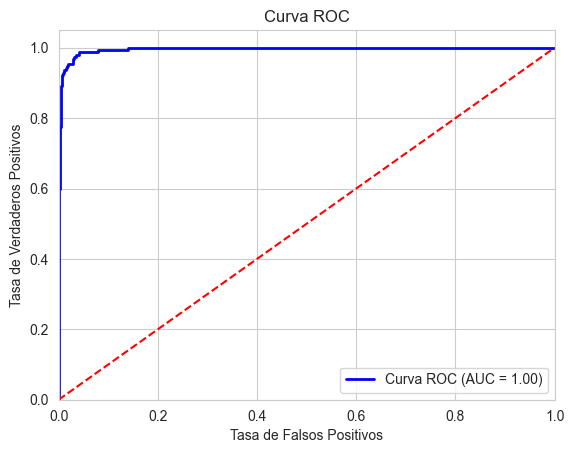

In [47]:
# Regresión logística Para 2004
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression

# Inicio el modelo de regresión logística
modelo_rl = LogisticRegression()

# Ajusto el modelo a los datos de entrenamiento
modelo_rl.fit(X_train_2004, y_train_2004)

# Hacer predicciones sobre los datos de prueba
y_prediccion = modelo_rl.predict(X_test_2004)
y_probabilidad = modelo_rl.predict_proba(X_test_2004)[:, 1]  # Probabilidades de la clase positiva

# Calculo la matriz de confusión
matriz_de_confusion = confusion_matrix(y_test_2004, y_prediccion)
print("Matriz de confusión:\n", matriz_de_confusion)

# calculo la precisión (accuracy)
exactitud = accuracy_score(y_test_2004, y_prediccion)
print("Accuracy:", exactitud)

# Calcular la curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test_2004, y_probabilidad)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


/opt/anaconda3/envs/Ciencia_de_Datos/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matriz de confusión:
 [[1988    0]
 [ 100    0]]
Accuracy: 0.9521072796934866
AUC: 0.8698189134808852


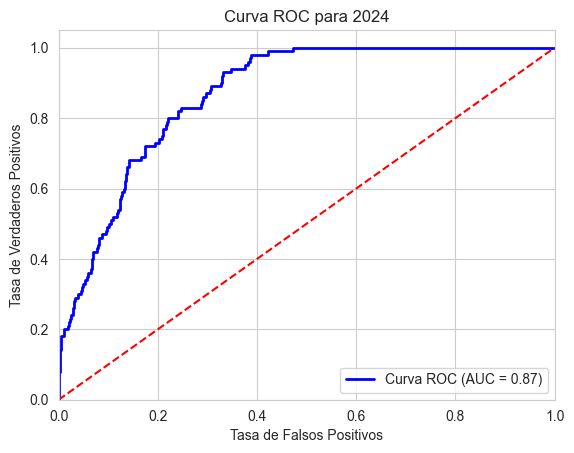

In [48]:
# Regresión logística para 2024
# Inicio el modelo de regresión logística
modelo_rl_24 = LogisticRegression()

# Ajusto el modelo a los datos de entrenamiento para 2024
modelo_rl_24.fit(X_train_2024, y_train_2024)

# Hacer predicciones sobre los datos de prueba para 2024
y_prediccion_24 = modelo_rl_24.predict(X_test_2024)
y_probabilidad_24 = modelo_rl_24.predict_proba(X_test_2024)[:, 1]  # Probabilidades de la clase positiva

# Calculo la matriz de confusión
matriz_de_confusion_24 = confusion_matrix(y_test_2024, y_prediccion_24)
print("Matriz de confusión:\n", matriz_de_confusion_24)

# Calculo la precisión (accuracy)
exactitud_24 = accuracy_score(y_test_2024, y_prediccion_24)
print("Accuracy:", exactitud_24)

# Calcular la curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test_2024, y_probabilidad_24)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para 2024')
plt.legend(loc='lower right')
plt.show()


Matriz de confusión:
 [[2084   13]
 [ 150    5]]
Accuracy: 0.927619893428064
AUC: 0.9752918916424385


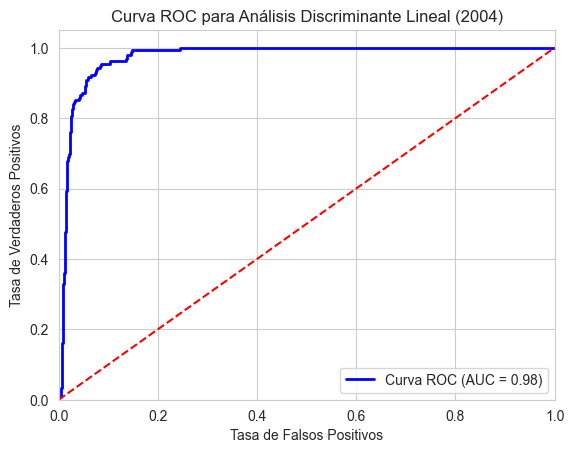

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Modelo lda para 2004

# Inicializo el modelo de Análisis Discriminante Lineal
modelo_lda = LinearDiscriminantAnalysis()

# Ajusto el modelo a los datos de entrenamiento para 2004
modelo_lda.fit(X_train_2004, y_train_2004)

# Hago predicciones sobre los datos de prueba para 2004
y_prediccion = modelo_lda.predict(X_test_2004)
y_probabilidad = modelo_lda.predict_proba(X_test_2004)[:, 1]  # Probabilidades de la clase positiva

# Calculo la matriz de confusión
matriz_de_confusion = confusion_matrix(y_test_2004, y_prediccion)
print("Matriz de confusión:\n", matriz_de_confusion)

# Calculo la precisión (accuracy)
exactitud = accuracy_score(y_test_2004, y_prediccion)
print("Accuracy:", exactitud)

# Calculo la curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test_2004, y_probabilidad)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Análisis Discriminante Lineal (2004)')
plt.legend(loc='lower right')
plt.show()


Matriz de confusión:
 [[1975   13]
 [ 100    0]]
Accuracy: 0.9458812260536399
AUC: 0.9635110663983905


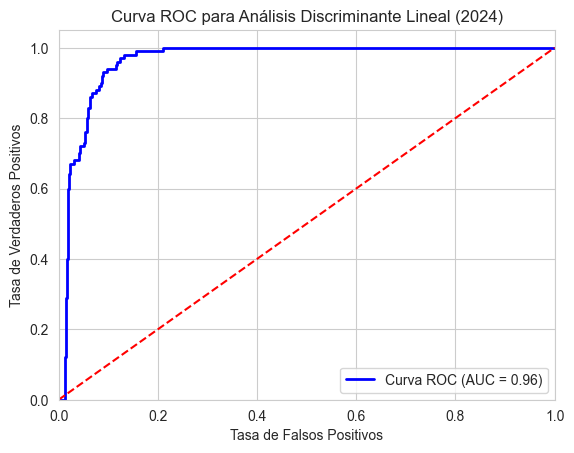

In [50]:

# Modelo lda para 2024
# Inicializo el modelo de Análisis Discriminante Lineal
modelo_lda = LinearDiscriminantAnalysis()

# Ajusto el modelo a los datos de entrenamiento para 2024
modelo_lda.fit(X_train_2024, y_train_2024)

# Hago predicciones sobre los datos de prueba para 2024
y_prediccion = modelo_lda.predict(X_test_2024)
y_probabilidad = modelo_lda.predict_proba(X_test_2024)[:, 1]  # Probabilidades de la clase positiva

# Calculo la matriz de confusión
matriz_de_confusion = confusion_matrix(y_test_2024, y_prediccion)
print("Matriz de confusión:\n", matriz_de_confusion)

# Calculo la precisión (accuracy)
exactitud = accuracy_score(y_test_2024, y_prediccion)
print("Accuracy:", exactitud)

# Calculo la curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test_2024, y_probabilidad)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Análisis Discriminante Lineal (2024)')
plt.legend(loc='lower right')
plt.show()


Matriz de confusión:
 [[2047   50]
 [ 122   33]]
Accuracy: 0.9236234458259325
AUC: 0.6895442029319919


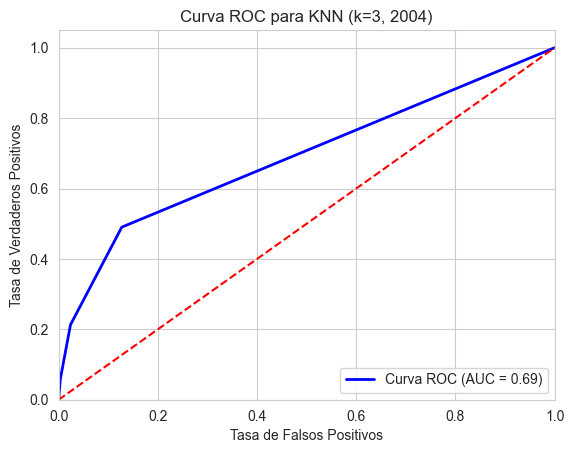

In [51]:
# Modelo knn con k=3 para 2004

from sklearn.neighbors import KNeighborsClassifier

# Inicializo el modelo de KNN con k=3
modelo_knn = KNeighborsClassifier(n_neighbors=3)

# Ajusto el modelo a los datos de entrenamiento para 2004
modelo_knn.fit(X_train_2004, y_train_2004)

# Hago predicciones sobre los datos de prueba para 2004
y_prediccion = modelo_knn.predict(X_test_2004)
y_probabilidad = modelo_knn.predict_proba(X_test_2004)[:, 1]  # Probabilidades de la clase positiva

# Calculo la matriz de confusión
matriz_de_confusion = confusion_matrix(y_test_2004, y_prediccion)
print("Matriz de confusión:\n", matriz_de_confusion)

# Calculo la precisión (accuracy)
exactitud = accuracy_score(y_test_2004, y_prediccion)
print("Accuracy:", exactitud)

# Calculo la curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test_2004, y_probabilidad)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para KNN (k=3, 2004)')
plt.legend(loc='lower right')
plt.show()


Matriz de confusión:
 [[1975   13]
 [  86   14]]
Accuracy: 0.9525862068965517
AUC: 0.6609079476861167


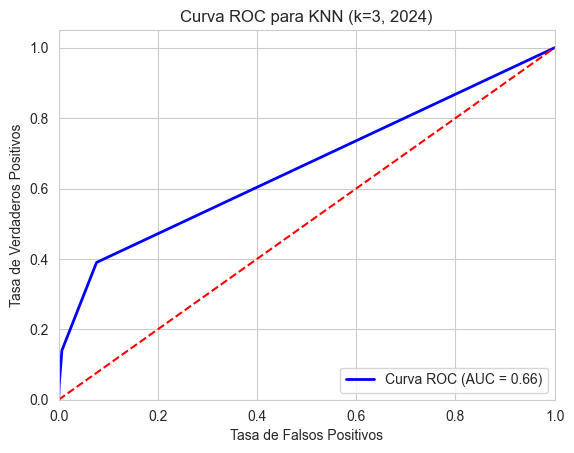

In [52]:
# Modelo knn con k=3 para 2024

# Inicializo el modelo de KNN con k=3
modelo_knn = KNeighborsClassifier(n_neighbors=3)

# Ajusto el modelo a los datos de entrenamiento para 2024
modelo_knn.fit(X_train_2024, y_train_2024)

# Hacer predicciones sobre los datos de prueba para 2024
y_prediccion = modelo_knn.predict(X_test_2024)
y_probabilidad = modelo_knn.predict_proba(X_test_2024)[:, 1]  # Probabilidades de la clase positiva

# Calculo la matriz de confusión
matriz_de_confusion = confusion_matrix(y_test_2024, y_prediccion)
print("Matriz de confusión:\n", matriz_de_confusion)

# Calculo la precisión (accuracy)
exactitud = accuracy_score(y_test_2024, y_prediccion)
print("Accuracy:", exactitud)

# Calcular la curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test_2024, y_probabilidad)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para KNN (k=3, 2024)')
plt.legend(loc='lower right')
plt.show()


Matriz de confusión:
 [[2097    0]
 [   7  148]]
Accuracy: 0.9968916518650088
AUC: 1.0


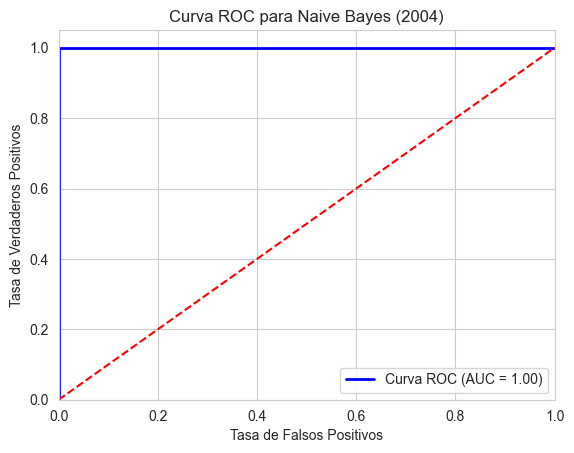

In [53]:
from sklearn.naive_bayes import GaussianNB
# Naive Bayes para 2004
# Inicializo el modelo de Naive Bayes
modelo_nb = GaussianNB()

# Ajusto el modelo a los datos de entrenamiento para 2004
modelo_nb.fit(X_train_2004, y_train_2004)

# Hacer predicciones sobre los datos de prueba para 2004
y_prediccion = modelo_nb.predict(X_test_2004)
y_probabilidad = modelo_nb.predict_proba(X_test_2004)[:, 1]  # Probabilidades de la clase positiva

# Calculo la matriz de confusión
matriz_de_confusion = confusion_matrix(y_test_2004, y_prediccion)
print("Matriz de confusión:\n", matriz_de_confusion)

# Calculo la precisión (accuracy)
exactitud = accuracy_score(y_test_2004, y_prediccion)
print("Accuracy:", exactitud)

# Calcular la curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test_2004, y_probabilidad)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Naive Bayes (2004)')
plt.legend(loc='lower right')
plt.show()


Matriz de confusión:
 [[1988    0]
 [ 100    0]]
Accuracy: 0.9521072796934866
AUC: 0.7329979879275654


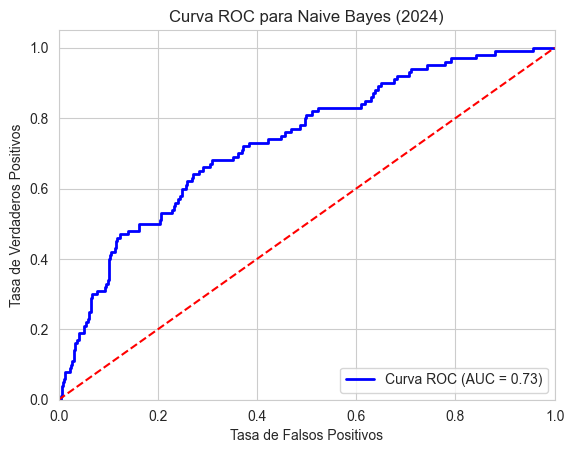

In [54]:
# Naive Bayes para 2024

# Inicializo el modelo de Naive Bayes
modelo_nb = GaussianNB()

# Ajusto el modelo a los datos de entrenamiento para 2024
modelo_nb.fit(X_train_2024, y_train_2024)

# Hacer predicciones sobre los datos de prueba para 2024
y_prediccion = modelo_nb.predict(X_test_2024)
y_probabilidad = modelo_nb.predict_proba(X_test_2024)[:, 1]  # Probabilidades de la clase positiva

# Calculo la matriz de confusión
matriz_de_confusion = confusion_matrix(y_test_2024, y_prediccion)
print("Matriz de confusión:\n", matriz_de_confusion)

# Calculo la precisión (accuracy)
exactitud = accuracy_score(y_test_2024, y_prediccion)
print("Accuracy:", exactitud)

# Calcular la curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test_2024, y_probabilidad)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Naive Bayes (2024)')
plt.legend(loc='lower right')
plt.show()


In [55]:
no_respondieron_test_2004 = no_respondieron.loc[no_respondieron['ano4'] == 2004.0]
no_respondieron_test_2024 = no_respondieron.loc[no_respondieron['ano4'] == 2024.0]

In [56]:
num_filas3 = no_respondieron_test_2004.shape[0]
print("Cantidad de filas:", num_filas3)

Cantidad de filas: 10


**EJ. 4**
Con el método que seleccionaron, predigan qué personas son desocupadas dentro de la base norespondieron. 
¿Qué proporción de las personas que no respondieron pudieron identificar como desocupadas?

In [60]:
from sklearn.naive_bayes import GaussianNB
modelo_nb_2 = GaussianNB()

# Ajusto el modelo a los datos de entrenamiento para 2004
modelo_nb_2.fit(X_train_2004, y_train_2004)

predicciones_no_respondidos = modelo_nb_2.predict(no_respondieron_test_2004)
predicciones_no_respondidos

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [61]:
modelo_lda_2 = LinearDiscriminantAnalysis()

# Ajusto el modelo a los datos de entrenamiento para 2004
modelo_lda_2.fit(X_train_2004, y_train_2004)

# Hago predicciones sobre los datos de prueba para 2004
y_prediccion = modelo_lda_2.predict(no_respondieron_test_2024)
y_prediccion

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])